# CSD filtered by various frequency bands

In [307]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import src.paths

In [215]:
date = '2022-09-16'
region = 'hpc'
raw = pd.read_pickle(src.paths.DATA / date / f'{date}-{region}-csd.pkl')

In [216]:
def isolate_notch(X, f=8, q=1):
    b, a = scipy.signal.iirnotch(f, q, 1250)
    y = scipy.signal.filtfilt(b, a, X)
    return X - y

In [217]:
fs = 1250
minute = 10
channel = 28
startsec = 60 * minute
endsec = 60 * (minute + 1)
x = raw.loc[startsec:endsec - 1 / fs, channel].values

In [300]:
def plot(x, start=0, end=1250):
    x = x[start:end]
    fig, ax = plt.subplots(4, 1, figsize=(8, 6))
    plt.suptitle(f'Session {date} minute {minute}, channel {channel}, samples {start}:{end}')

    plt.sca(ax[0])
    plt.title('CSD, 1-300 Hz bandpass')
    plt.plot(x)
    plt.xticks([])
    plt.sca(ax[1])
    plt.title('8 Hz notch')
    plt.plot(isolate_notch(x, f=8))
    plt.xticks([])
    plt.sca(ax[2])
    plt.title('30 Hz notch')
    plt.plot(isolate_notch(x, f=30))
    plt.xticks([])
    plt.sca(ax[3])
    plt.title('70 Hz notch')
    plt.plot(isolate_notch(x, f=70))

    plt.tight_layout()
    plt.savefig('2022-09-16-csd-bands-1.png', dpi=300)
    plt.show()

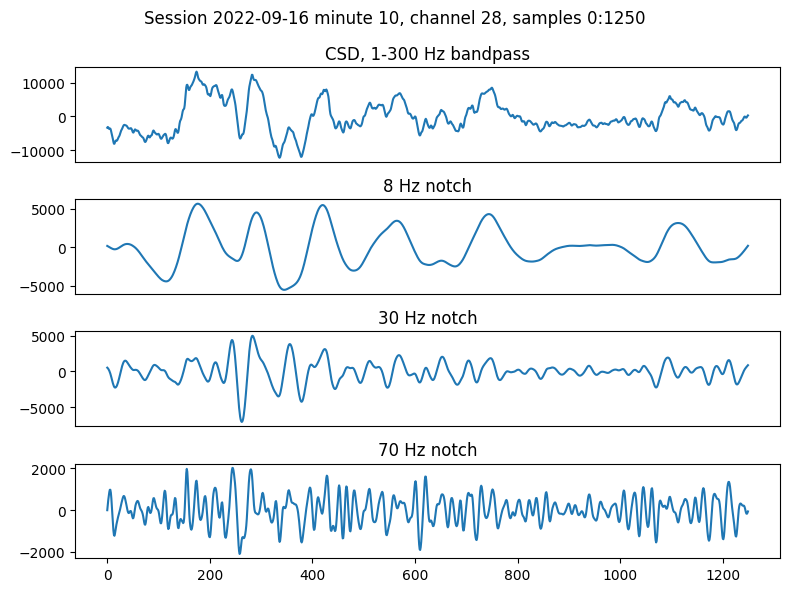

In [301]:
plot(x)

In [302]:
def plot(x, start=0, end=1250):
    x = x[start:end]
    fig, ax = plt.subplots(4, 1, figsize=(8, 8))
    plt.suptitle(f'Session {date} minute {minute}, channel {channel}, samples {start}:{end}')

    plt.sca(ax[0])
    plt.plot(isolate_notch(x, f=8) + isolate_notch(x, f=30), 'black', label='sum')
    plt.plot(isolate_notch(x, f=8), 'blue', label='8 Hz')
    plt.plot(isolate_notch(x, f=30), 'red', label='30 Hz')
    plt.legend()
    
    plt.sca(ax[1])
    plt.plot(isolate_notch(x, f=30) + isolate_notch(x, f=70), 'black', label='sum')
    plt.plot(isolate_notch(x, f=30), 'red', label='30 Hz')
    plt.plot(isolate_notch(x, f=70), 'cyan', label='70 Hz')
    plt.legend()
    
    plt.sca(ax[2])
    plt.plot(isolate_notch(x, f=8) + isolate_notch(x, f=30) + isolate_notch(x, f=70), 'black', label='sum')
    plt.plot(isolate_notch(x, f=8), 'blue', label='8 Hz')
    plt.plot(isolate_notch(x, f=30) + isolate_notch(x, f=70), 'magenta', label='30 + 70 Hz')
    plt.legend()
    
    plt.sca(ax[3])
    plt.plot(x, 'black', label='true')
    plt.plot(isolate_notch(x, f=8) + isolate_notch(x, f=30) + isolate_notch(x, f=70) - x, 'gray', label='error')
    plt.plot(isolate_notch(x, f=8) + isolate_notch(x, f=30) + isolate_notch(x, f=70), 'blue', label='sum')
    plt.legend()

    plt.tight_layout()
    plt.savefig('2022-09-16-csd-bands-2.png', dpi=300)
    plt.show()

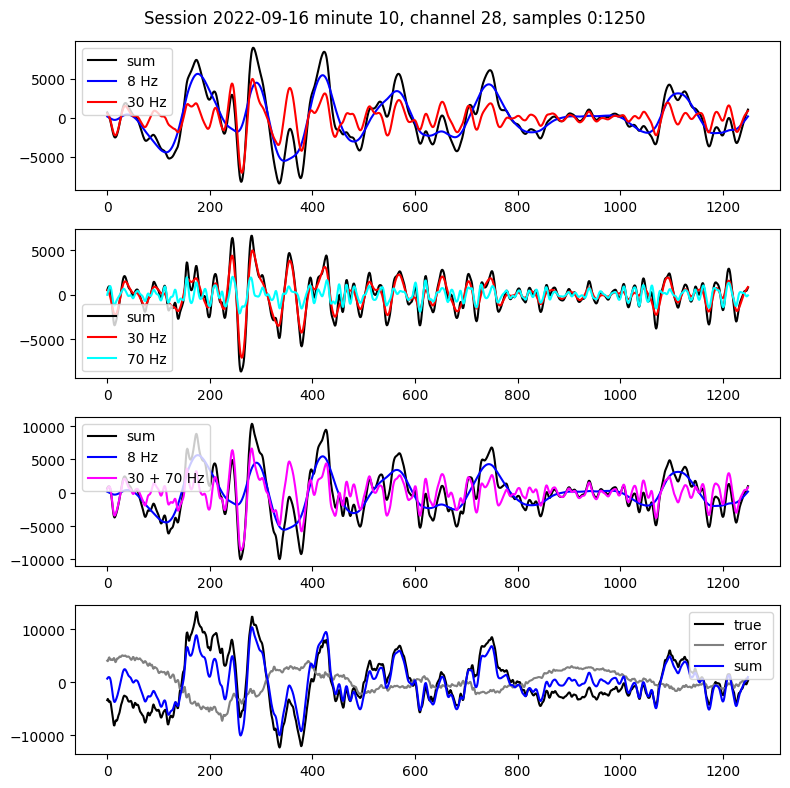

In [303]:
plot(x, start=0, end=1250)

---

In [304]:
freq = 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15

In [305]:
y = []
for f in freq:
    y.append(isolate_notch(x[:1250], f))

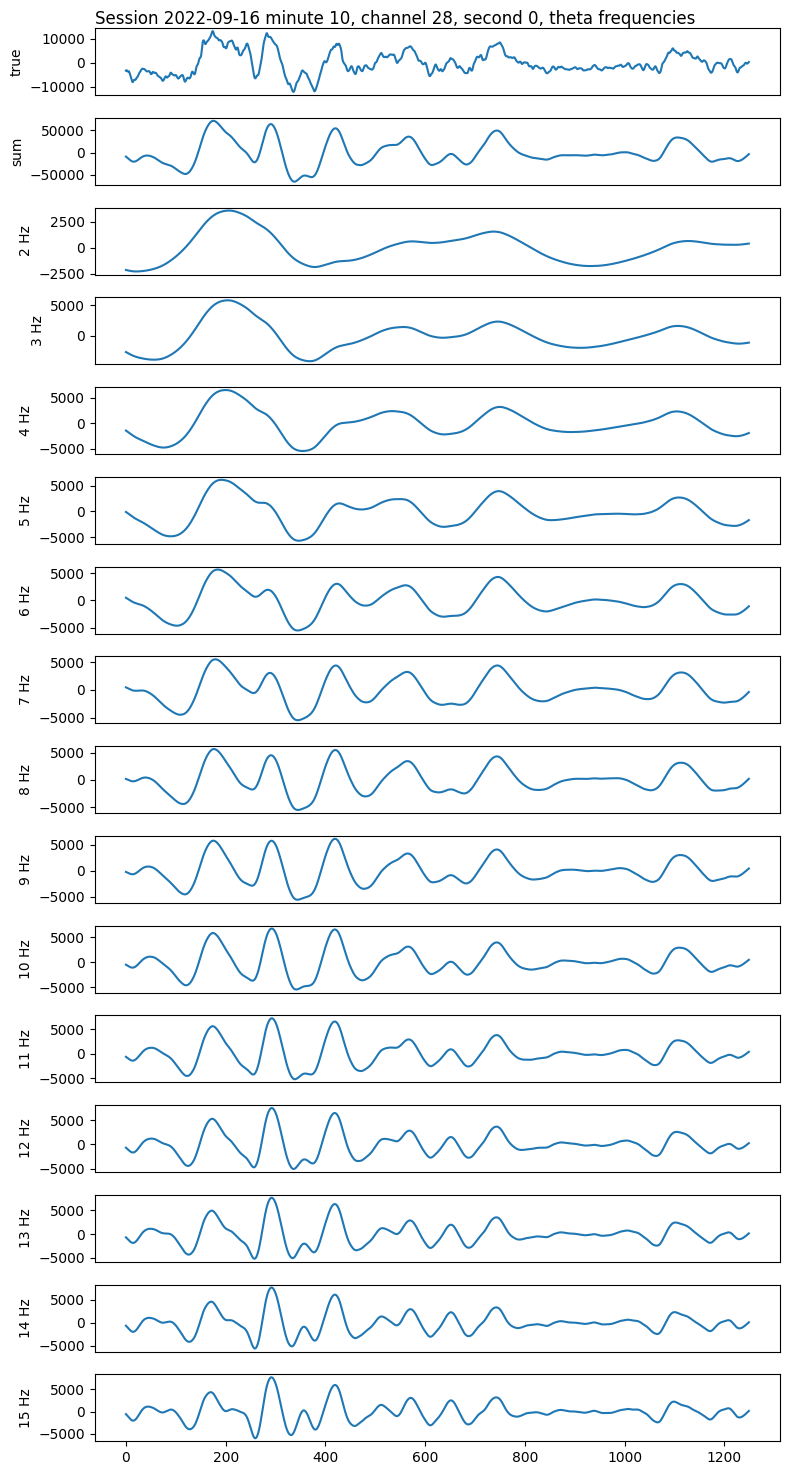

In [306]:
fig, ax = plt.subplots(len(freq) + 2, 1, figsize=(8, 15))
plt.suptitle('Session 2022-09-16 minute 10, channel 28, second 0, theta frequencies')
plt.sca(ax[0])
plt.ylabel('true')
plt.plot(x[:1250])
plt.xticks([])
plt.sca(ax[1])
plt.ylabel('sum')
plt.plot(np.sum(y, axis=0))
plt.xticks([])
for i in range(1, len(freq) + 1):
    plt.sca(ax[i + 1])
    plt.ylabel(f'{freq[i - 1]} Hz')
    plt.plot(y[i - 1])
    if i < len(freq):
        plt.xticks([])
plt.tight_layout()
plt.savefig('2022-09-16-csd-bands-3.png', dpi=300)
plt.show()